# Entrega Intermediária

In [1]:
import os
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'C:/Users/gabri/Downloads/archive'
os.listdir(path)

['olist_orders_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'product_category_name_translation.csv']

In [3]:
df_orders = pd.read_csv(f'{path}/olist_orders_dataset.csv', na_values=['', np.nan])
# df_orders.head()

In [4]:
df_reviews = pd.read_csv(f'{path}/olist_order_reviews_dataset.csv', na_values=['', np.nan])
# df_reviews.head()

In [5]:
df = pd.merge(df_reviews, df_orders, on='order_id') 
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09 00:00:00


In [6]:
count_review_message = df[df['review_comment_message'].notnull()].count()
count_reviw_title = df[df['review_comment_title'].notnull()].count()
print(f"Número de mensagens de reviews preenchidas: {count_review_message['review_comment_message']}")
print(f"Número de títulos de reviews preenchidos: {count_reviw_title['review_comment_title']}")

Número de mensagens de reviews preenchidas: 40977
Número de títulos de reviews preenchidos: 11568


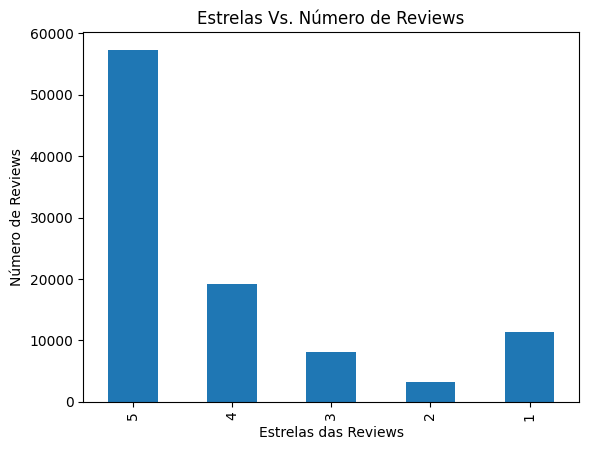

In [7]:
stars = df['review_score'].value_counts()
stars = stars.reindex([5, 4, 3, 2, 1])
stars.plot(kind='bar')

plt.xlabel('Estrelas das Reviews')
plt.ylabel('Número de Reviews')
plt.title('Estrelas Vs. Número de Reviews')
plt.show()

In [8]:
count_review_message = df[df['review_comment_message'].notnull()].count()
count_reviw_title = df[df['review_comment_title'].notnull()].count()
print(f"Número de mensagens de reviews preenchidas: {count_review_message['review_comment_message']}")
print(f"Número de títulos de reviews preenchidos: {count_reviw_title['review_comment_title']}")

Número de mensagens de reviews preenchidas: 40977
Número de títulos de reviews preenchidos: 11568


In [9]:
# download stopwords em português
stopwords_url = "https://gist.githubusercontent.com/alopes/5358189/raw/2107d809cca6b83ce3d8e04dbd9463283025284f/stopwords.txt"
stopwords_list = urllib.request.urlopen(stopwords_url).read().decode()
stopwords = set(stopwords_list.split())

# stopwords